# Video Game Sales Insight
by Theofilus Wisnu Handaru (wisnu.theofilus@gmail.com)

This notebook was made to help me train my data analyst skill. For analysis, I took the Video Game Sales dataset from **kaggle.com** that was made by **Gregory Smith**. The reason I choose this dataset is that lately, I watch **HIGH SCORE** from Netflix and intrigue to look closely at the history of video games from a sales perspective. 

Video Game Sales Dataset contains a list of video game titles that have been made from 1980 to 2020, however, I know several games aren't included in this dataset. Therefore this insight is only used for training. To become more accurate, we need to use a better dataset about video game sales.

All type of data that included in this dataset are:
- Rank
- Name
- Platform
- Year
- Genre
- Publisher
- NA_Sales
- EU_Sales
- JP_Sales
- Other_Sales
- Global_Sales

The objective of this insight are:
- Find out the most popular and profitable Genre
- Find out the most popular and profitable Platform
- Comparing sales per regional

## Let's get started

The first step of the analysis was to **import** all library needed and read the **dataset**. For this insight, the dataset will be called `df`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

%matplotlib inline

# import the video game sales dataset
# its important to place the python notebook file in same folder as 
    # the vgsales.csv

df = pd.read_csv('./vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Dataframe above shows all columns included in the video game sales dataset. There is a total of 16598 data sort from highest `Global_Sales` to the lowest.

> There isn't any explanation of what the value meaning in the `Sales` columns. It should be assumed that number in million-copy sales.

After that, the dataset should be cleansed. The dataset should be **checked** if there any **missing value**

In [2]:
# check is there any null value and show it for every columns
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

It is shown that there are several missing values in `Year` column and `Publisher` column. Because those two columns have character value. then it couldn't fill by mean number. 
>Then, it's better to **remove** those **missing values**.

In [3]:
# drop every row with missing value
df.dropna(inplace = True)

#After that, check for any missing value again
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

After recheck, it shows that there aren't anymore missing values in this dataset. 

Next, should **dropped** any **unimportant columns**. In this case, column `Rank` was one of the unimportant columns. However, since there aren't any index in this dataset, `Rank` could be the index of the dataset

In [4]:
# Change the Rank column to be index
df = df.set_index('Rank')
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


> The data has been cleansed and ready to use for analysis

### Basic & Sales

This section of the analysis will cover all basic and sales information of the dataset. The sales also could be differentiated per region, even though the region covered only `NA`, `EU`, and `JP`

To start the analysis, it's better to **look for the correlation** of each column. The greater correlation value indicates the greater connection between those two columns

> To see the correlation more easily could use heatmap figure

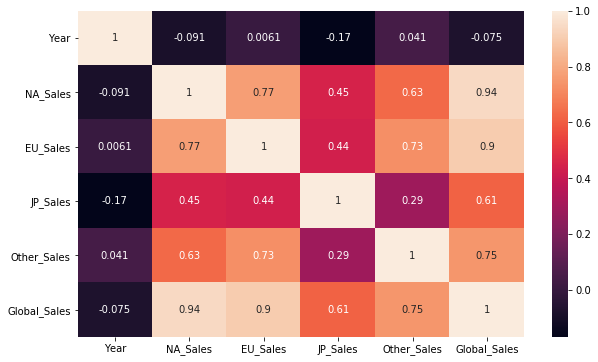

In [5]:
# Prepare the figure size
plt.figure(figsize=(10,6))

# Make the heatmap of the correlation
sns.heatmap(df.corr(),annot=True) 

From the heatmap figure above, it could be seen that there only a few pairs that correlate more than 0.9, which are `NA_Sales`-`Global_Sales` and `EU_Sales`-`Global_Sales`. It means that the value of `Global_Sales` has a high influence from both `NA_Sales` and `EU_Sales`. Other than those 3 columns, there aren't any pair that correlate worth noticing.
> The higher value of both `EU_Sales` and `NA_Sales` will increase the value of `Global_Sales`

Next, to help to understand the whole distribution of the game, it's a better look at total video games through all years. It could be seen by **plotting count value of the data by `Year`**.

Text(0.5, 0.98, 'Video Games Count')

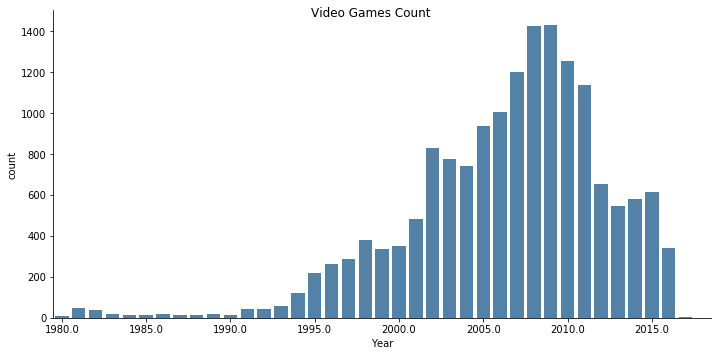

In [6]:
# Show total video games through the Years

g = sns.catplot("Year", data=df, aspect=2,
                       kind="count", color='steelblue')

g.set_xticklabels(step=5)
g.fig.suptitle('Video Games Count')

The graph above shows that the data of video games included in this dataset mostly release above the year 2000. However, since it didn't show all the video games that have been made, then this graph only use to show the spread of the game through the years.

That figure also shows that the video games industry growing since its first release, however it declining in the number of products in recent years.

To **look** closely the **growth of video games industry sales** could be seen from `Global_Sales` chart **through the years**

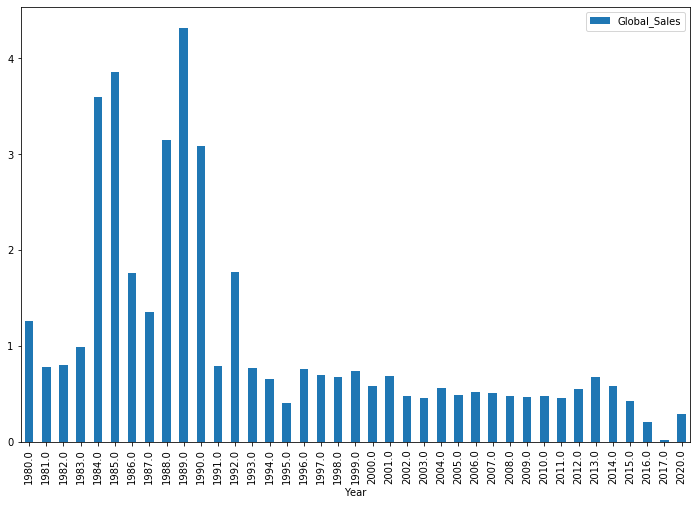

In [7]:
df1 =  df[["Year",'Global_Sales']]
df1 = df1.groupby(['Year']).mean()

df1.plot(kind='bar',figsize=(12,8))

From the figure above, it could be seen that there is a massive growth of sales early in the video game timeline. However. from 1993 to the present, there tend to be more constant through the years.

Since different regions could have different characteristics, it's better to **see the sales graph for each region**.

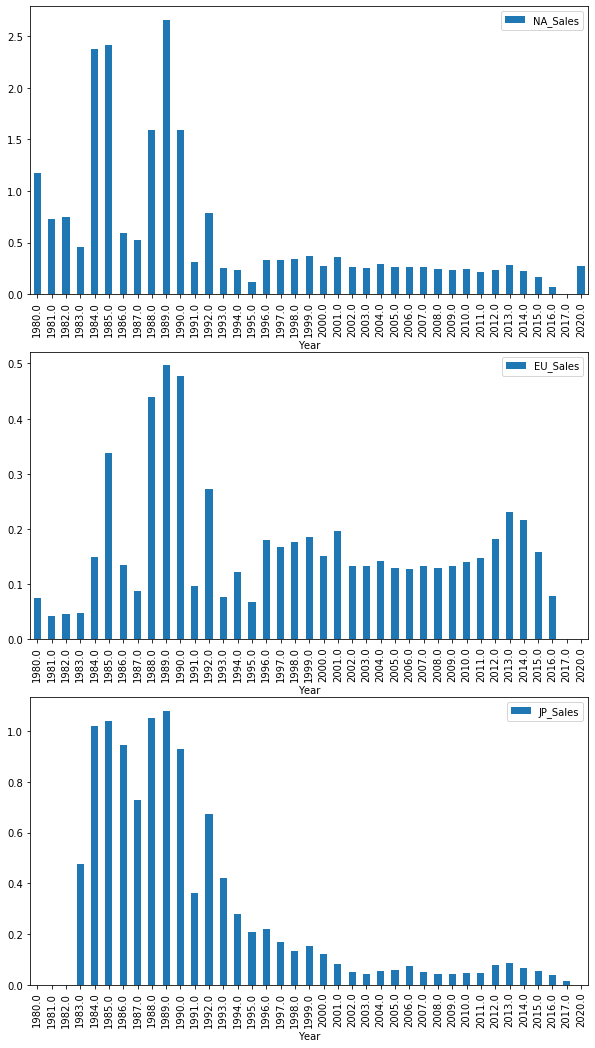

In [8]:
# Setting the dataframe for each region
df1 =  df[["Year",'NA_Sales']]
df1 = df1.groupby(['Year']).mean()

df2 =  df[["Year",'EU_Sales']]
df2 = df2.groupby(['Year']).mean()

df3 =  df[["Year",'JP_Sales']]
df3 = df3.groupby(['Year']).mean()

# Setting the subplot
nrow = 3
ncol = 1


fig, axes = plt.subplots(nrow, ncol)

df1.plot(ax=axes[0],kind='bar',figsize=(10,18))
df2.plot(ax=axes[1],kind='bar',figsize=(10,18))
df3.plot(ax=axes[2],kind='bar',figsize=(10,18))

From figures above shown the difference in video games sales growth for each region. It could be seen that `JP` has more constant high growth early at the beginning than other regions. However `JP` and  `NA` have declining growth at lately years, but `EU` has constant growth at lately years

### Genre

In the **HIGH SCORE** documentary that I mentioned before, one thing that always pops up in the history of video games is Video Games `Genre`.

Although technology play an important role in video game development, but art was important to make every game have different soul and uniqueness. Therefore, every developer of video games tend to have a unique taste to enjoy their game, that what called as `Genre` of video games. For example some developers love platform genre because of its simplicity but need strategy to finish the challenge, others love shooter genre that always rely on reflex.

People who play the game also have their preference `Genre`. Like other sales, the highest sales number will belong to the most favorable `Genre`. Therefore, this section will fully analyst the dataset by `Genre`

To look closely at this section, it's important to understand the spread of the video games `Genre` in this dataset.
> It needs to look **value count of each Genre** in this dataset

Text(0.5, 1.0, 'Genre Count')

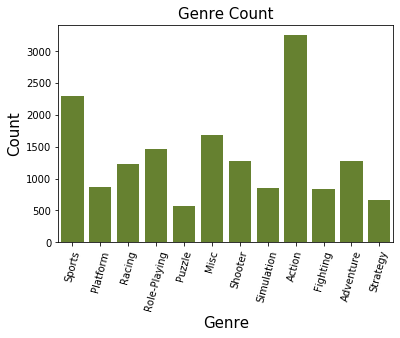

In [9]:
# Plot value count for each genre

chart = sns.countplot(x = 'Genre', 
                      data = df,
                      color = 'olivedrab')

chart.set_xticklabels(chart.get_xticklabels(), 
                      rotation=75,)

plt.xlabel('Genre',size = 15)
plt.ylabel('Count',size = 15)
plt.title('Genre Count',size = 15)

From the figure above, it could be seen that `Genre` with the most video games title was Action Genre, followed by Sports Genre in second place. However, it didn't show the most loveable `Genre`.

Usually, the most favorable `Genre` will have the highest sales worldwide. 
> Then, it needs to **look at mean `Global_Sales` value for each genre**

For finding this graph, people could make all needed code in 1 place, however, this instruction will tell step by step

In [10]:
# Plot mean value of Global Sales for each Genre

# Make dataframe that only consist of Genre and Global Sales
df_x = df[['Genre','Global_Sales']]
df_x.head()

,Genre,Global_Sales
Rank,,
1,Sports,82.74
2,Platform,40.24
3,Racing,35.82
4,Sports,33.00
5,Role-Playing,31.37


In [11]:
# Then, make a group by dataframe by Genre consist of mean value of Global Sales for each Genre

df_x2 = df_x.groupby("Genre").mean()
df_x2

,Global_Sales
Genre,
Action,0.529942
Adventure,0.184137
Fighting,0.531160
Misc,0.468488
Platform,0.947577
Puzzle,0.424930
Racing,0.593273
Role-Playing,0.628456
Shooter,0.800468


In [12]:
# Using groupby will make Genre as the index and cannot be plotted
# It need to exclude the index first, then make the plot

df_x3 = df_x2.reset_index()
df_x3

,Genre,Global_Sales
0,Action,0.529942
1,Adventure,0.184137
2,Fighting,0.531160
3,Misc,0.468488
4,Platform,0.947577
5,Puzzle,0.424930
6,Racing,0.593273
7,Role-Playing,0.628456
8,Shooter,0.800468
9,Simulation,0.459882


[Text(0, 0, 'Action'),
 Text(0, 0, 'Adventure'),
 Text(0, 0, 'Fighting'),
 Text(0, 0, 'Misc'),
 Text(0, 0, 'Platform'),
 Text(0, 0, 'Puzzle'),
 Text(0, 0, 'Racing'),
 Text(0, 0, 'Role-Playing'),
 Text(0, 0, 'Shooter'),
 Text(0, 0, 'Simulation'),
 Text(0, 0, 'Sports'),
 Text(0, 0, 'Strategy')]

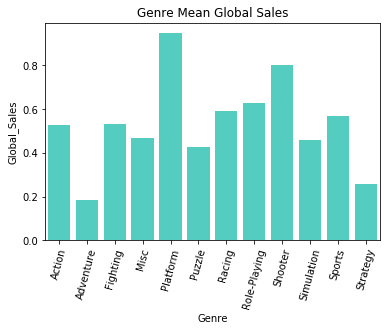

In [13]:
# Lastly, it could be make a plot from those dataframe

chart = sns.barplot(x = df_x3['Genre'],
                    y = df_x3['Global_Sales'],
                    data = df_x3,
                   color = 'turquoise')

chart.set_title('Genre Mean Global Sales')

chart.set_xticklabels(chart.get_xticklabels(), 
                      rotation=75,)

From the figure above, it could be seen that `Genre` with the highest `Global_Sales` is Platform Genre with more than 0.8, followed by Shooter in second place with around 0.8.

It's interesting to say there are differences in the most made `Genre` are Action genre and Sport genre. They mean `Global_Sales` value didn't reach 0.6, much lower than Platfrom genre and Shooter genre.

> From this data it could be concluded that if `Global_Sales` was the target that needs to be achieved, then video game developer better make Platform genre or Shooter genre

To have a good analysis of Genre, it's better to **look at the difference between regions**.

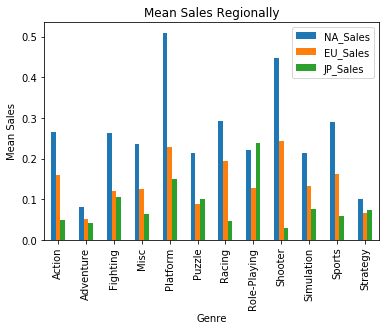

In [14]:
df_a = df[["Genre",'NA_Sales','EU_Sales','JP_Sales']]

df_b = df_a.groupby(['Genre']).mean()

df_b.plot(kind="bar")
plt.title("Mean Sales Regionally")
plt.xlabel("Genre")
plt.ylabel("Mean Sales")
plt.savefig('Genre Sales Regionally.png', bbox_inches='tight')

This figure shows that every region has high sales at `Platform` genre, however `Shooter` genre only favorable for `NA` and `EU` region. `JP` region has very little demand for `Shooter` region, but very high demand for `Role_Playing` genre, even higher than `NA` or `EU`.
> From this, it better to know which region that video game developer want to prioritize or which genre should be made  

### Platform

Video games are digital properties, which mean it needs a certain medium to enjoy. This medium is usually called `Platfrom`.

It's better to start from the look upon the spread of video games count through each `Platform`

Text(0.5, 1.0, 'Platform Count')

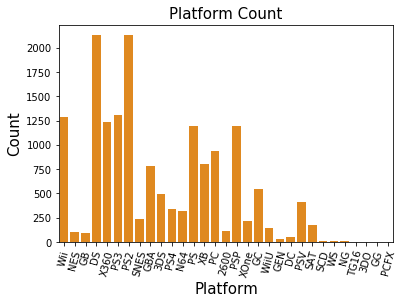

In [15]:
chart = sns.countplot(x = 'Platform', 
                      data = df,
                      color = 'darkorange')

chart.set_xticklabels(chart.get_xticklabels(), 
                      rotation=75,)

plt.xlabel('Platform',size = 15)
plt.ylabel('Count',size = 15)
plt.title('Platform Count',size = 15)

From the figure above, it tells that there is so many `Platform`. In **HIGH SCORE** that I watch before, there are many `Platform` companies since the beginning of video game history. Some of those big names are ATARI and SEGA. However, not so many of them survive to the present day.

Therefore, it's better to **categorize the platform to the big 3 PLATFORM COMPANY** that survive until now, which are **MICROSOFT**, **SONY**, and **NINTENDO**, others company will put into **OTHER**. To know which `Platform` belongs to those companies, it needed to use outside information.
> Make a list of categorized platform

In [16]:
# Categorize to big 3 Platform Companeis which are SONY, MICROSOFT, dan NINTENDO

big3platform = [None]*len(df['Platform'])

platfrom_list = list(df["Platform"]) 

for x in range(0,len(df['Platform'])):
    if platfrom_list[x] == 'PS' or platfrom_list[x] == 'PS2' or platfrom_list[x] == 'PS3' or platfrom_list[x] == 'PS4' or platfrom_list[x] == 'PSP' or platfrom_list[x] == 'PSV':
        big3platform[x] = 'Sony'
    elif platfrom_list[x] == 'X360' or platfrom_list[x] == 'XB' or platfrom_list[x] == 'XOne':
        big3platform[x] = 'Microsoft'
    elif platfrom_list[x] == 'DS' or platfrom_list[x] == 'GB' or platfrom_list[x] == 'GBA' or platfrom_list[x] == 'N64' or platfrom_list[x] == 'NES' or platfrom_list[x] == 'SNES' or platfrom_list[x] == 'Wii' or platfrom_list[x] == 'WiiU':
        big3platform[x] = 'Nintendo'
    else :
        big3platform[x] = 'Other'

After being categorized, it should be **put in the data frame as new columns**, called `Categorized_Platform`

In [17]:
df['Categorize_Platform'] = np.array(big3platform)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Categorize_Platform
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo


Since the data frame has been ready, it could be used to analyze. First of all, it's better to **look total spread of video games for every `Categorize_Platform`**

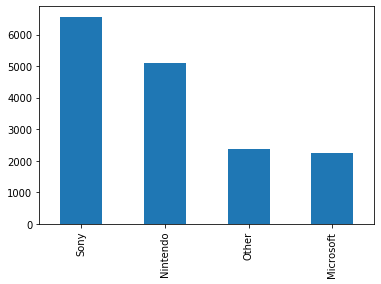

In [18]:
df['Categorize_Platform'].value_counts().plot(kind='bar')

The figure above tells that `Sony` is the company that has the highest number of video games, on other hand `Microsoft` is the company that has the lowest number of video games, even less than `Other`.

Then it will be meaningful if compared to the mean value of `Global_Sales` for each `Platform`

Text(0, 0.5, 'Sales')

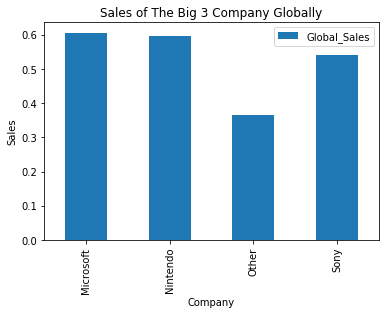

In [19]:
df_a = df[['Categorize_Platform','Global_Sales']]

df_b = df_a.groupby(['Categorize_Platform']).mean()

df_b.plot(kind="bar")
plt.title("Sales of The Big 3 Company Globally")
plt.xlabel("Company")
plt.ylabel("Sales")
#plt.savefig('Platform Games Sales Across Globe.png', bbox_inches='tight')

Those figures show the mean value of `Global Sales` for video games that could be played in each `Platform`. Interestingly, `Microsoft` is the company with the highest mean value of `Global_Sales`and `Sony` is the lowest. However, the difference between those 3 Company aren't far apart, it's less than 0.1.

For more accurate analysis, it's better to look for sales in each region for those companies.

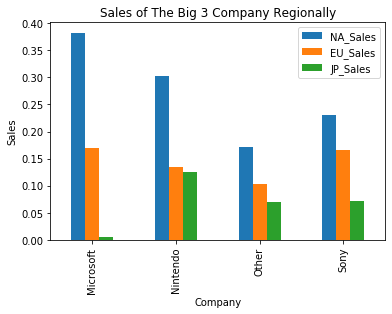

In [20]:
df_a = df[["Categorize_Platform",'NA_Sales','EU_Sales','JP_Sales']]

df_b = df_a.groupby(['Categorize_Platform']).mean()

df_b.plot(kind="bar")
plt.title("Sales of The Big 3 Company Regionally")
plt.xlabel("Company")
plt.ylabel("Sales")
plt.savefig('Company Games Sales for each Region.png', bbox_inches='tight')

The figure above tells about the difference in video games sales for each big 3 `Platform` company. In `NA`, `Microsoft` dominate the sales followed by `Nintendo`, however in `EU`, both `Microsoft` and `Sony` leading the sales with quite the same value. In the other hand `JP` is different, `Nintendo` dominate the market far above the others, even `Microsoft` who leading in other region is the lowest one in `JP`.

## Conclusion

In conclusion, video games are interesting industry that still has constant sales through the years. Moreover, from this insight, it could help video game developer to analyze their market for each game they develop. 

**For example**:

If the target was getting the highest sales, it's better focusing make video games that use `Microsoft` platform, especially with `Platform` genre or `Shooter` genre where has high sales in `NA`.

If the target was highest sales at `JP`, it's better to make video games that use `Nintendo` platform, especially `Role_Playing` genre where has the highest sales in `JP`.

### That's all of this insight. Thank you to Gregory Smith for this great dataset.
Thank you for reading this insight. I hope you like it!